In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [13]:
#f = r.TFile("./data/gm2offline_ana_18398217_1544537266.466_PDF_Hists.root")
#f = r.TFile("./data/results_4D_PDF_May15.root")
fileName = "./data/results_4D_PDF_May22.root"
f = r.TFile(fileName)
#f.ls()

In [3]:
parsUnscaled = []
parNames = ["rmin", "rmax", "rbins", "vmin", "vmax", "vbins", "thetamin", "thetamax", "thetabins", "haddcounter"]
for pari in parNames:
    try:
        parsUnscaled.append( f.Get(pari).GetVal() )
    except:
        print(pari)
print(parsUnscaled)

[1060050.0, 1073550.0, 3150.0, -6750.0, 6750.0, 3150.0, 0.0, 942.4785766601562, 10800.0, 150.0]


In [4]:
pars = []
for pari in parsUnscaled:
    pars.append( pari/parsUnscaled[len(parsUnscaled)-1])
print(pars)

[7067.0, 7157.0, 21.0, -45.0, 45.0, 21.0, 0.0, 6.283190511067708, 72.0, 1.0]


In [5]:
rbins = int(pars[2])
vbins = int(pars[5])
thetabins = int(pars[8])

In [6]:
Elow = 1700
Ehigh = 3500

In [7]:
calo = 1

---

### Lets start by just creating a plot of all the decay positrons for energies > our cutoff

We can do this by just getting all entries in these histograms

Bin: 2


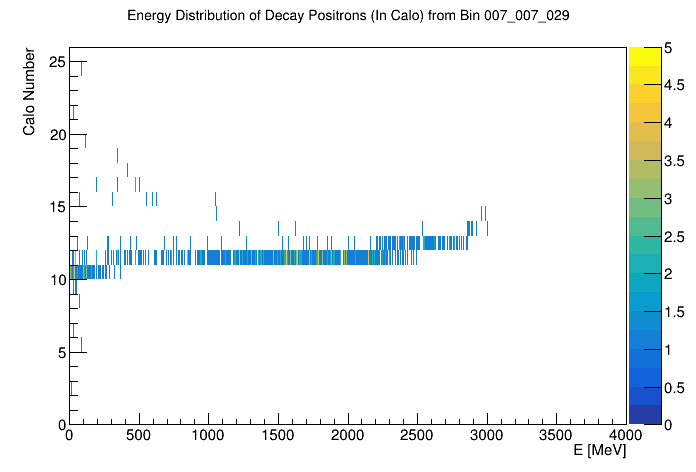

In [8]:
h2d = f.Get("he_007_007_029")
print("Bin:", h2d.GetYaxis().FindBin(calo))
c = r.TCanvas()
h2d.Draw("colz")
c.Draw()

Starting Calo: 1
    Starting r bin: 0
    Starting r bin: 1
    Starting r bin: 2
    Starting r bin: 3
    Starting r bin: 4
    Starting r bin: 5
    Starting r bin: 6
    Starting r bin: 7
    Starting r bin: 8
    Starting r bin: 9
    Starting r bin: 10
    Starting r bin: 11
    Starting r bin: 12
    Starting r bin: 13
    Starting r bin: 14
    Starting r bin: 15
    Starting r bin: 16
    Starting r bin: 17
    Starting r bin: 18
    Starting r bin: 19
    Starting r bin: 20
Starting Calo: 2
    Starting r bin: 0
    Starting r bin: 1
    Starting r bin: 2
    Starting r bin: 3
    Starting r bin: 4
    Starting r bin: 5
    Starting r bin: 6
    Starting r bin: 7
    Starting r bin: 8
    Starting r bin: 9
    Starting r bin: 10
    Starting r bin: 11
    Starting r bin: 12
    Starting r bin: 13
    Starting r bin: 14
    Starting r bin: 15
    Starting r bin: 16
    Starting r bin: 17
    Starting r bin: 18
    Starting r bin: 19
    Starting r bin: 20
Starting Calo: 3
   

Info in <TCanvas::SaveAs>: ROOT file ./data/PDF_MuonUnscaled_Energies_1700_3500_Calo1_May22.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./data/PDF_MuonUnscaled_Energies_1700_3500_Calo2_May22.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./data/PDF_MuonUnscaled_Energies_1700_3500_Calo3_May22.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./data/PDF_MuonUnscaled_Energies_1700_3500_Calo4_May22.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./data/PDF_MuonUnscaled_Energies_1700_3500_Calo5_May22.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file ./data/PDF_MuonUnscaled_Energies_1700_3500_Calo6

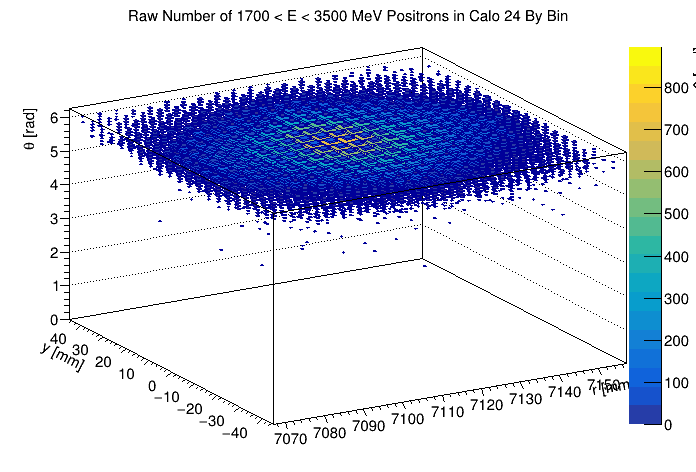

In [10]:
for calo in range(1,25):
    print("Starting Calo:", calo)
    PDF_AllEnergies = r.TH3D("PDF_AllEnergies",
                             "Raw Number of "+str(Elow)+" < E < "+str(Ehigh)+" MeV Positrons in Calo "+str(calo)+" By Bin; r [mm]; y [mm]; #theta [rad]",
                             int(pars[2]),pars[0],pars[1], #r
                             int(pars[5]),pars[3],pars[4], #v
                             int(pars[8]),pars[6],pars[7]  #theta
                            )
    PDF_AllEnergies.SetDirectory(0)

    for rbin in range(rbins):
        print("    Starting r bin:", rbin)
        f = r.TFile(fileName)
        for vbin in range(vbins):
            for thetabin in range(thetabins):
                binstring = str(rbin).zfill(3)+"_"+str(vbin).zfill(3)+"_"+str(thetabin).zfill(3)
                #positrons = f.Get("he_"+binstring).GetEntries()
                h2d = f.Get("he_"+binstring)
                biny = h2d.GetYaxis().FindBin(calo) #should be calo + 1 in current config
                h = h2d.ProjectionX("_px", biny, biny).Clone()
                bin1 = h.FindBin(Elow)
                bin2 = h.FindBin(Ehigh)
                deltaBin = bin2-bin1
                positrons = h.Integral(bin1,bin2)
                #if(positrons > 0):
                #    print(binstring)
                #    print("    Bin Contents:", positrons)
                PDF_AllEnergies.SetBinContent(rbin + 1, vbin + 1, thetabin + 1, positrons)
        f.Close()

    c = r.TCanvas("c","c",700,500)
    PDF_AllEnergies.Draw("box2 colz")
    c.Draw()
    c.Print("./data/PDF_MuonUnscaled_Energies_"+str(Elow)+"_"+str(Ehigh)+"_Calo"+str(calo)+"_May22.root")

In [11]:
nbins = PDF_AllEnergies.GetZaxis().GetNbins()

---

### Now lets scale this by the number of muons

In [14]:
muCountHist = f.Get("muCountHist").Clone()

Info in <TCanvas::SaveAs>: ROOT file ./data/MuonCount_Energies_1700_3500_May22.root has been created


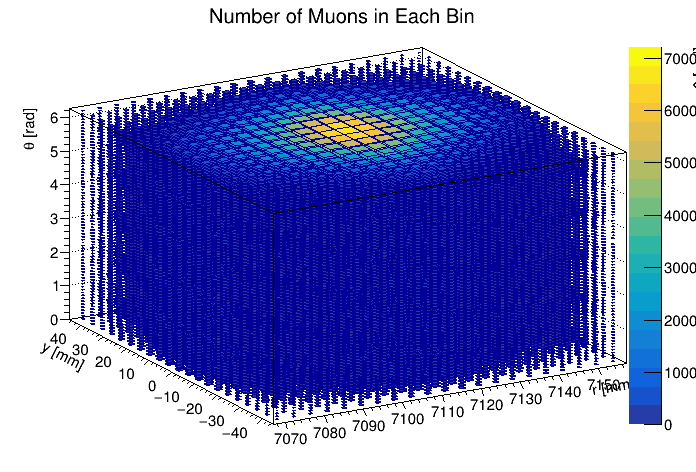

In [15]:
c = r.TCanvas()
muCountHist.Draw("lego2 colz")
muCountHist.GetXaxis().SetLimits(pars[0],pars[1])
muCountHist.GetYaxis().SetLimits(pars[3],pars[4])
muCountHist.GetZaxis().SetLimits(pars[6],pars[7])
c.Draw()
c.Print("./data/MuonCount_Energies_"+str(Elow)+"_"+str(Ehigh)+"_May22.root")

In [16]:
scaledMuonDist = PDF_AllEnergies.Clone("scaledMuonDist")
scaledMuonDist.GetZaxis().UnZoom()

In [17]:
for rbin in range(rbins):
    for vbin in range(vbins):
        for thetabin in range(thetabins):
            muons = muCountHist.GetBinContent(rbin+1,vbin+1,thetabin+1)
            positrons = scaledMuonDist.GetBinContent(rbin+1,vbin+1,thetabin+1)
            if(muons > 0):
                scaled = positrons / muons
            else:
                scaled = 0
            scaledMuonDist.SetBinContent(rbin+1,vbin+1,thetabin+1, scaled)

In [18]:
print(scaledMuonDist,PDF_AllEnergies)

<ROOT.TH3D object ("scaledMuonDist") at 0x7f2dc4c7cdd0> <ROOT.TH3D object ("PDF_AllEnergies") at 0x7ffff3fae4a0>


Info in <TCanvas::SaveAs>: ROOT file ./data/PDF_Energies_1700_3500_Calo24_May22.root has been created


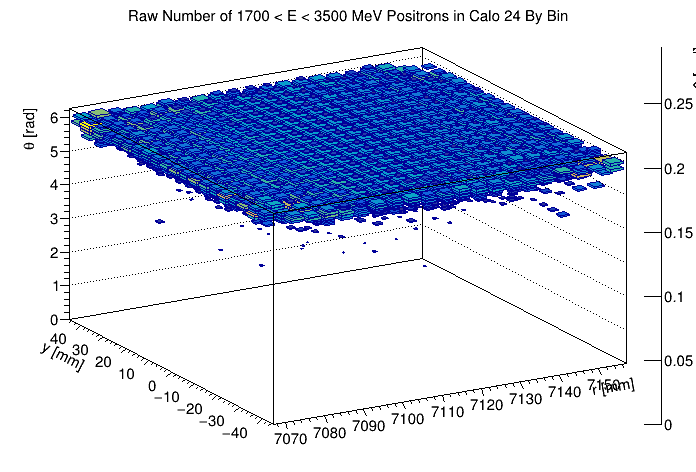

In [19]:
c = r.TCanvas()
scaledMuonDist.Draw("lego2z")
c.Draw()
c.Print("./data/PDF_Energies_"+str(Elow)+"_"+str(Ehigh)+"_Calo"+str(calo)+"_May22.root")

Info in <TCanvas::Print>: png file ./images/PDF_Calo24_000.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_Calo24_001.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_Calo24_002.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_Calo24_003.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_Calo24_004.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_Calo24_005.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_Calo24_006.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_Calo24_007.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_Calo24_008.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_Calo24_009.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_Calo24_010.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_Calo24_011.png has been created
Info in <TCanvas::Print>: png file ./ima

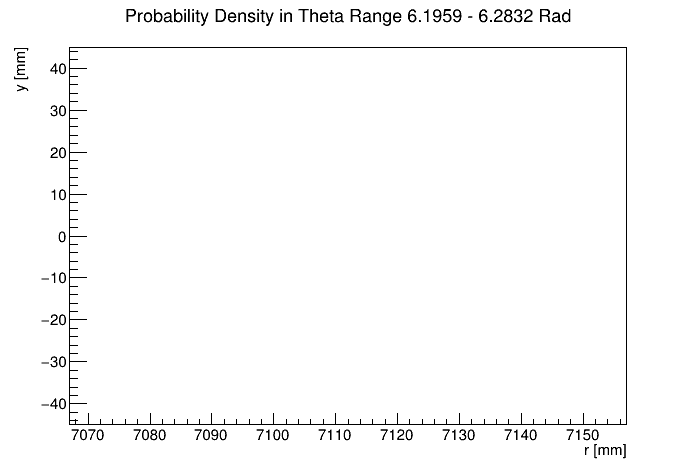

In [20]:
c = r.TCanvas("c","c",700,500)

histVec = []
for i in range(nbins):
    c.cd(i+1)
    scaledMuonDist.GetZaxis().SetRange(i+1,i+1)
    hi = scaledMuonDist.Project3D("yx").Clone("h"+str(i))
    #hi.GetZaxis().SetRangeUser(0.1,0.5)
    thetastep = (pars[7] - pars[6])/(pars[8])
    thetamin = pars[6] + i*thetastep
    thetamax = pars[6] + (i+1)*thetastep
    hi.SetTitle("Probability Density in Theta Range \n"+str(round(thetamin,4))+" - "+str(round(thetamax,4))+" Rad")
    
    histVec.append(hi.Clone())
    histVec[i].Draw("colz")
    #r.gPad.SetLogz()
    c.Draw()
    c.Print("./images/PDF_Calo"+str(calo)+"_"+str(i).zfill(3)+".png")